###### Customer churn prediction is to measure why customers are leaving a business. In this notebook we will be looking at customer churn in telecom business and  will build a machine learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [1]:
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv('C:\\Users\\Acer\\Desktop\\ML notebook\\Telco Customer Churn\\Telco-Customer-Churn.csv')

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### drop customerID column as it is of no use

In [4]:
df.drop('customerID', axis=1,inplace= True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### TotalCharges are instring but its a numbers

In [7]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
TotalCharges_null=df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
TotalCharges_null 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df= df[df.TotalCharges!=' ']
df.shape

(7032, 20)

In [12]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)
df.TotalCharges.dtypes

dtype('float64')

#### Data Visualization

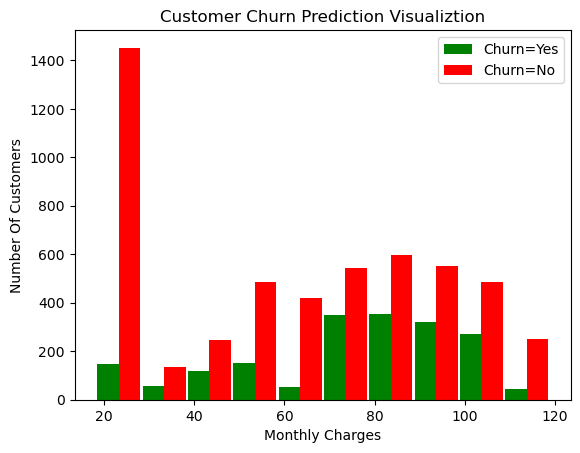

In [194]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges      
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [195]:
def print_unique_col(df):
    for i in df:
        if df[i].dtypes=='O':
            print(f'{i}: {df[i].unique()}')
print_unique_col(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


###### In OnlineSecurity, meaning of  No internet service is same as No, replace with No

In [196]:
df.replace('No internet service','No', inplace=True)

In [197]:
df.replace('No phone service','No', inplace=True)

In [198]:
def print_unique_col(df):
    for i in df:
        if df[i].dtypes=='O':
            print(f'{i}: {df[i].unique()}')
print_unique_col(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [199]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [200]:
column =['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']
for col in column:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [201]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [202]:
df['gender'].replace({'Female':0,'Male':1}, inplace = True)

##### create dummies to 'InternetService' , 'Contract', PaymentMethod 

In [224]:
df1 = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [225]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [226]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_col = ['tenure','MonthlyCharges','TotalCharges']
df1[scale_col] = scaler.fit_transform(df1[scale_col])

In [227]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [231]:
x= df1.drop('Churn',axis=1)
y= df1['Churn']

In [232]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=123)

In [273]:
model1= LogisticRegression(solver = 'liblinear',random_state=0)
model1.fit(x_train,y_train)
model1.score(x_train,y_train)

0.8028444444444445

In [274]:
y_pred =model1.predict(x_test)
model1.score(x_test,y_test)

0.8088130774697939

In [252]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [253]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[916  80]
 [189 222]]


In [254]:
df1.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

### smote

In [257]:
from sklearn.utils import resample
novac = df1[df1.Churn==0]
vac= df1[df1.Churn==1]
vac_oversample= resample(vac,
                         replace=True,
                        n_samples=len(novac),
                        random_state=27)
dfsmote=pd.concat([novac,vac_oversample])
dfsmote.Churn.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [258]:
x2=dfsmote.loc[:,dfsmote.columns!='Churn']
y2= dfsmote.loc[:,dfsmote.columns=='Churn']
y2.value_counts()

Churn
0        5163
1        5163
dtype: int64

In [259]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x2, y2, test_size=0.3, random_state = 0)

In [260]:
model2= LogisticRegression(solver='saga',random_state=0)
model2.fit(xtrain1,ytrain1)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='saga')

In [261]:
model2.score(xtrain1,ytrain1)

0.7701992252351965

In [262]:
y_pred_sm=model2.predict(xtest1)
y_pred_sm

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [263]:
cm2=metrics.confusion_matrix(ytest1,y_pred_sm)
print(cm2)

[[1086  452]
 [ 295 1265]]


In [264]:
model2.score(xtest1,ytest1)

0.7588766946417044

In [291]:
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [292]:
#Decision Tree
clf = tree.DecisionTreeClassifier()
tf_clf = clf.fit(x_train, y_train)

In [293]:
tf_clf.get_depth()

30

In [294]:
y_pred = tf_clf.predict(x_test)

In [295]:
tf_clf.score(x_train,y_train)

0.9976888888888888

In [339]:
tf_clf.score(x_test,y_test)

0.7356076759061834

In [298]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [299]:
depth=[1,2,3,4,5,6,7,8,9]
accuracy_train,accuracy_test=[],[]
for i in depth:
    model=DecisionTreeClassifier(max_depth=i,random_state=12)
    model.fit(x_train,y_train)
    y_train_pred1=model.predict(x_train)
    y_test_pred1=model.predict(x_test)
    accuracy_train.append(accuracy_score(y_train,y_train_pred1))
    accuracy_test.append(accuracy_score(y_test,y_test_pred1))

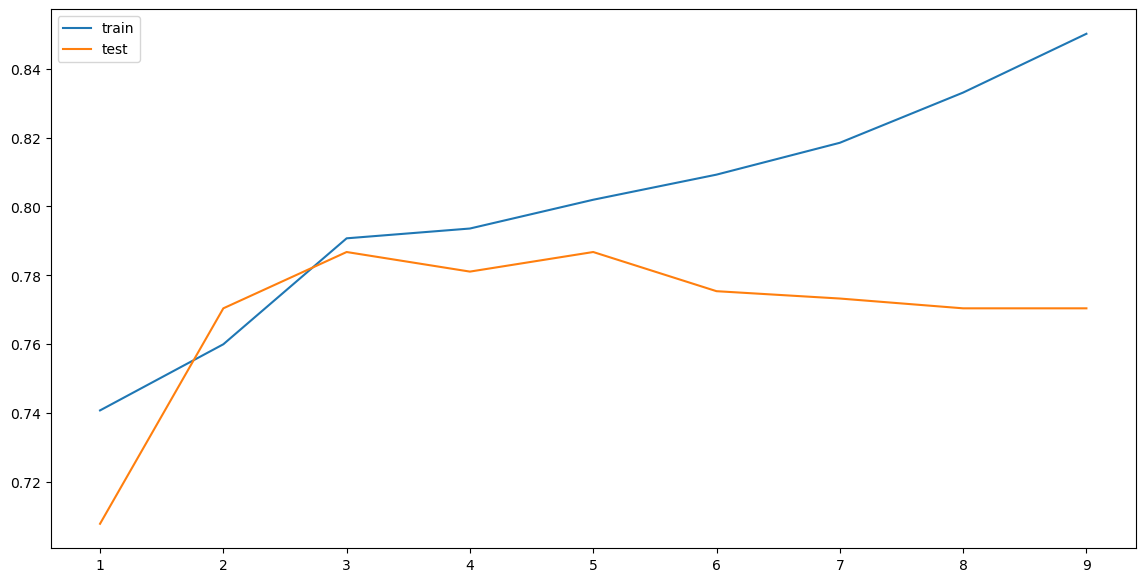

In [300]:
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=depth,label='train')
sns.lineplot(y=accuracy_test,x=depth,label='test')
plt.show()

In [301]:
model= DecisionTreeClassifier(random_state=1,max_depth=3)
model.fit(x_train,y_train)
y_train_pred12=model.predict(x_train)
y_test_pred12=model.predict(x_test)

print(round(accuracy_score(y_train,y_train_pred12),3))
print(round(accuracy_score(y_test,y_test_pred12),3))

0.791
0.787


In [302]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

In [303]:
model_params={
    'n_estimators':[50,150,250],
    'max_features':['sqrt',.25,.5,.75,1],
    'min_samples_split':[2,4,6]
}

In [304]:
rf_model1=RandomForestClassifier(random_state=1)

In [308]:
clf= GridSearchCV(rf_model1,model_params,cv=5)

In [309]:
model=clf.fit(x_train,y_train)

In [310]:
model.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.25,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [314]:
model.score(x_train,y_train)

0.9489777777777778

In [315]:
y_pred = model.predict(x_test)

In [316]:
model.score(x_test,y_test)

0.7960199004975125

In [317]:
print(round(accuracy_score(y_test,y_pred),3))

0.796


In [346]:
rfr = RandomForestClassifier(n_estimators = 150,max_features= 0.25,
                           random_state= 1,criterion= 'gini' , min_samples_split=6) 
tf_rfr = rfr.fit(x_train, y_train) # takes time

In [347]:
y_pred = tf_rfr.predict(x_test)

In [348]:
tf_rfr.score(x_train,y_train)

0.9489777777777778

In [349]:
tf_rfr.score(x_test,y_test)

0.7960199004975125

In [350]:
tf_rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.25,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}